<a href="https://colab.research.google.com/github/oki-aryawan/All-OpenCV/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition
I got this from Udemy Course
04-02-2022

### Loading datasets

In [1]:
from PIL import Image
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
file = '/content/drive/MyDrive/ComputerVision/datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=file, mode = 'r')
zip_object.extractall('./')
zip_object.close()


In [3]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    image = Image.open(path).convert('L')
    #print(type(image))
    image_np = np.array(image, 'uint8')
    #print(type(image_np))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

ids, faces = get_image_data()



### Train LBPH Classifer


In [4]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors=14, grid_x = 9, grid_y = 9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [5]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')
test_image = '/content/yalefaces/test/subject01.gif'

image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')

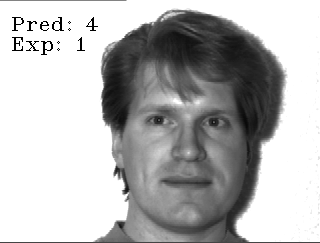

In [6]:
prediction = lbph_face_classifier.predict(image_np)
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))

cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

### Evaluating the face classifier

In [7]:
file_test = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
outputs = []
for path in file_test:
  img = Image.open(path).convert('L')
  np_img = np.array(img, 'uint8')
  prediction, _ = lbph_face_classifier.predict(np_img)
  output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(prediction)
  outputs.append(output)

In [8]:
predictions = np.array(predictions)
outputs = np.array(outputs)

Test Accuracy

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(outputs, predictions)
print(f'Accuracy: {accuracy}')
len(predictions)

Accuracy: 0.7


30

Accuracy Visualization

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

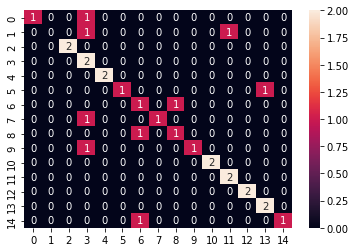

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
display = confusion_matrix(outputs, predictions)
sns.heatmap(display, annot=True)
display